In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv('economic_index.csv')

In [4]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [5]:
## Drop unnecessary Columns
df = df.drop(columns=['Unnamed: 0', 'year', 'month'], axis=1)

In [6]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [7]:
## Check Null values
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

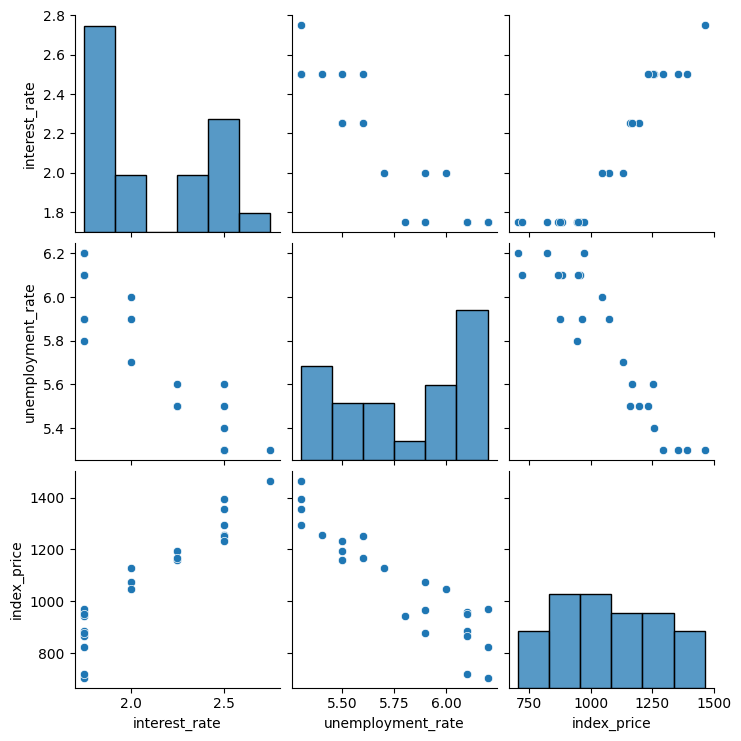

In [8]:
## Visualization
import seaborn as sns
sns.pairplot(df)

In [9]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'Un Employement Rate')

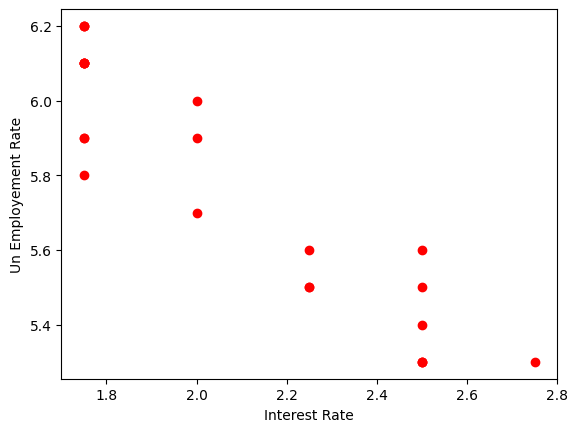

In [11]:
plt.scatter(df['interest_rate'], df['unemployment_rate'], color='r')
plt.xlabel('Interest Rate')
plt.ylabel('Un Employement Rate')

In [16]:
## Independent and Dependent Features
X = df[['interest_rate', 'unemployment_rate']]
y = df['index_price']

In [17]:
y

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64

In [18]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [19]:
import seaborn as sns

<Axes: xlabel='interest_rate', ylabel='index_price'>

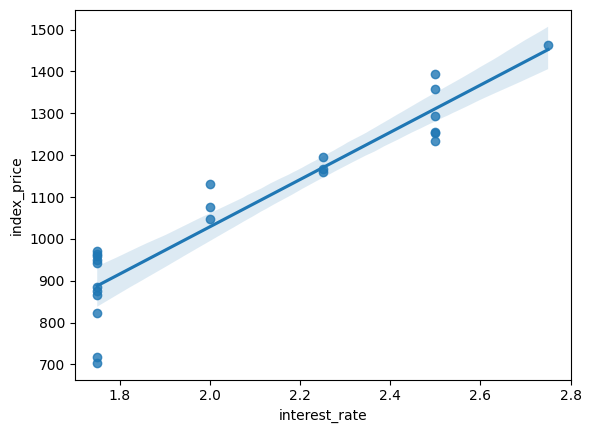

In [24]:
sns.regplot(x=df['interest_rate'], y=df['index_price'])

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

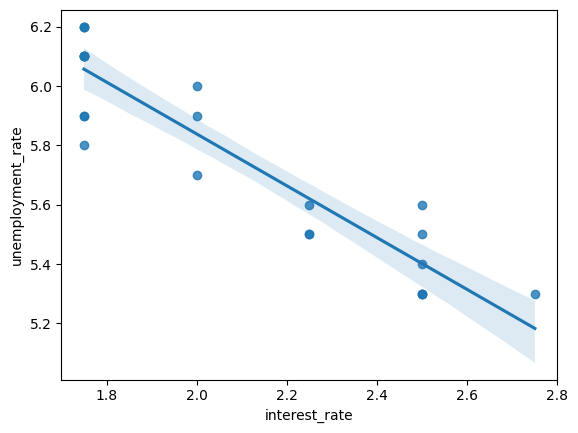

In [25]:
sns.regplot(x=df['interest_rate'], y=df['unemployment_rate'])

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [27]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [29]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()

In [30]:
regression.fit(X_train, y_train)

LinearRegression()

In [32]:
from sklearn.model_selection import cross_val_score

validation_score = cross_val_score(regression, X_train, y_train, scoring="neg_mean_squared_error", cv=3)

In [33]:
validation_score

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [34]:
## Prediction
y_pred = regression.predict(X_test)

In [35]:
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [36]:
## Performance Metric
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
score = r2_score(y_test, y_pred)

print(mse)
print(mae)
print(rmse)
print(score)

5793.762887712569
59.935781523235484
76.11677139574805
0.8278978091457145


In [37]:
## Assumptions

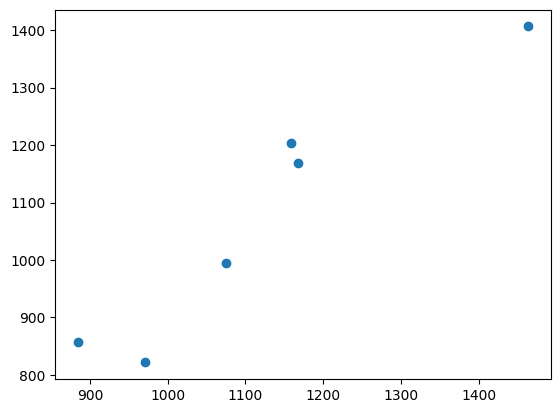

In [38]:
plt.scatter(y_test, y_pred)

In [39]:
residuals = y_test -y_pred
print(residuals)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


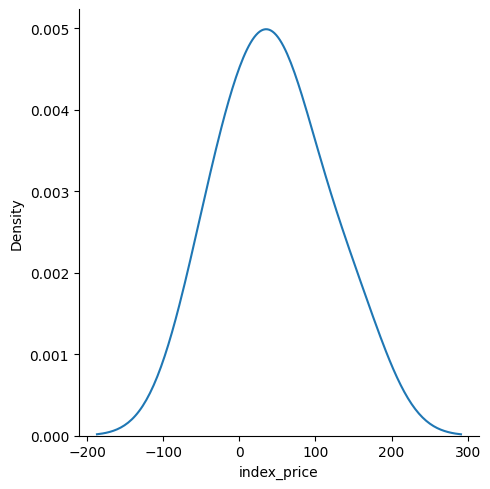

In [40]:
sns.displot(residuals, kind='kde')